In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [293]:
train = pd.read_csv("Train.csv")
train.head()

,Site_Area,Structure_Type,Water_Consumption_Per_Building,Recycling_Rate,Utilization_Rate,Air_Quality_Index,Issue_Resolution_Time,Resident_Count,Electricity_Cost
0,Hebbal,Residential,1558.887420,38.143488,96.190774,60.329943,9.776145,333,15421.85624
1,Koramangala,Institutional,760.738916,30.365679,85.709589,29.613212,12.011880,306,22247.03278
2,Banashankari,Commercial,782.410030,33.219435,80.258544,60.630260,16.698976,482,19999.25905
3,Yelahanka,Commercial,536.149475,34.094487,74.981293,65.965449,20.128330,99,14641.76268
4,Malleshwaram,Commercial,544.149079,12.764772,94.415086,37.341041,1.564507,228,21492.92556


In [294]:
train.shape

(11220, 9)

In [295]:
train.isnull().sum()

Site_Area                         0
Structure_Type                    0
Water_Consumption_Per_Building    0
Recycling_Rate                    0
Utilization_Rate                  0
Air_Quality_Index                 0
Issue_Resolution_Time             0
Resident_Count                    0
Electricity_Cost                  0
dtype: int64

In [296]:
train.duplicated().sum()

0

In [297]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11220 entries, 0 to 11219
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Site_Area                       11220 non-null  object 
 1   Structure_Type                  11220 non-null  object 
 2   Water_Consumption_Per_Building  11220 non-null  float64
 3   Recycling_Rate                  11220 non-null  float64
 4   Utilization_Rate                11220 non-null  float64
 5   Air_Quality_Index               11220 non-null  float64
 6   Issue_Resolution_Time           11220 non-null  float64
 7   Resident_Count                  11220 non-null  int64  
 8   Electricity_Cost                11220 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 789.0+ KB


In [298]:
train.describe()

,Water_Consumption_Per_Building,Recycling_Rate,Utilization_Rate,Air_Quality_Index,Issue_Resolution_Time,Resident_Count,Electricity_Cost
count,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000
mean,669.627346,30.424071,76.978462,47.913144,10.888584,254.848396,17766.972343
std,442.334223,14.819558,14.360527,28.049396,5.772868,137.276697,4462.290170
min,50.000000,0.013758,20.502148,0.058908,1.003604,1.000000,3946.936159
25%,310.926100,19.612979,67.192753,26.056544,6.446922,157.000000,14678.697615
50%,645.350875,30.022837,77.354007,45.228772,10.360982,253.000000,17752.676615
75%,974.595698,40.430728,87.830490,66.519578,14.648047,350.000000,20721.172898
max,2497.575182,92.115273,100.000000,162.748798,37.726069,772.000000,35983.966990


In [299]:
test = pd.read_csv("Test.csv")
test.head()

,Site_Area,Structure_Type,Water_Consumption_Per_Building,Recycling_Rate,Utilization_Rate,Air_Quality_Index,Issue_Resolution_Time,Resident_Count,Electricity_Cost
0,Whitefield,Industrial,719.630788,27.476868,99.951059,56.119189,2.039493,240,NaN
1,Jayanagar,Institutional,1305.457784,21.145004,89.309460,5.715728,13.887603,289,NaN
2,Indiranagar,Residential,332.920291,7.627161,70.004578,58.871173,20.668144,121,NaN
3,HSR Layout,Institutional,50.000000,14.960299,84.691139,46.652539,3.086289,248,NaN
4,Yelahanka,Industrial,933.529154,8.156364,62.423731,37.278611,7.461491,329,NaN


In [300]:
test.shape

(300, 9)

In [301]:
test.isnull().sum()

Site_Area                           0
Structure_Type                      0
Water_Consumption_Per_Building      0
Recycling_Rate                      0
Utilization_Rate                    0
Air_Quality_Index                   0
Issue_Resolution_Time               0
Resident_Count                      0
Electricity_Cost                  300
dtype: int64

In [302]:
test.duplicated().sum()

0

<Axes: ylabel='Electricity_Cost'>

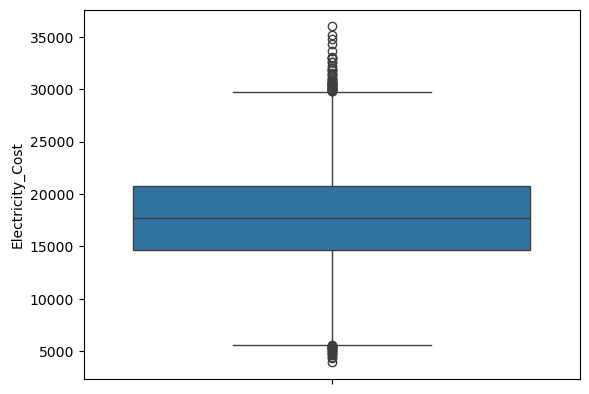

In [303]:
sns.boxplot(train['Electricity_Cost'])

In [304]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(11520, 9)

In [305]:
combined['Site_Area'].nunique()

11

In [306]:
combined['Site_Area'].value_counts()

Site_Area
Koramangala        1114
Hebbal             1086
Electronic City    1085
Jayanagar          1061
Banashankari       1060
Indiranagar        1052
Yelahanka          1038
Malleshwaram       1029
HSR Layout         1027
BTM Layout         1024
Whitefield          944
Name: count, dtype: int64

In [307]:
combined['Structure_Type '].nunique()

4

In [308]:
combined['Structure_Type '].value_counts()

Structure_Type 
Commercial       2911
Residential      2899
Institutional    2855
Industrial       2855
Name: count, dtype: int64

In [309]:
combined.head()

,Site_Area,Structure_Type,Water_Consumption_Per_Building,Recycling_Rate,Utilization_Rate,Air_Quality_Index,Issue_Resolution_Time,Resident_Count,Electricity_Cost
0,Hebbal,Residential,1558.887420,38.143488,96.190774,60.329943,9.776145,333,15421.85624
1,Koramangala,Institutional,760.738916,30.365679,85.709589,29.613212,12.011880,306,22247.03278
2,Banashankari,Commercial,782.410030,33.219435,80.258544,60.630260,16.698976,482,19999.25905
3,Yelahanka,Commercial,536.149475,34.094487,74.981293,65.965449,20.128330,99,14641.76268
4,Malleshwaram,Commercial,544.149079,12.764772,94.415086,37.341041,1.564507,228,21492.92556


In [310]:
combined['Water_Intensity_Resident'] = combined['Water_Consumption_Per_Building'] / combined['Resident_Count'].replace(0, np.nan)

In [311]:
combined = combined.rename({'Recycling_Rate ': 'Recycling_Rate'}, axis = 1)

In [312]:
combined['Recycling_x_Resident'] = combined['Recycling_Rate'] * combined['Resident_Count']
combined['Waste_Generation_Rate'] = 1 - combined['Recycling_Rate']

In [313]:
combined['Utilization_x_AQI'] = combined['Utilization_Rate'] * combined['Air_Quality_Index']

In [314]:
combined['Is_Poor_Air'] = (combined['Air_Quality_Index'] > 100).astype(int)
combined['AQI_x_Resident'] = combined['Air_Quality_Index'] * combined['Resident_Count']

In [315]:
combined['Slow_Response'] = (combined['Issue_Resolution_Time'] > 24).astype(int)
combined['Issue_Delay_Score'] = combined['Issue_Resolution_Time'] / combined['Utilization_Rate'].replace(0, np.nan)

In [316]:
combined['Electricity_Per_Resident'] = combined['Electricity_Cost'] / combined['Resident_Count'].replace(0, np.nan)

In [317]:
combined['Green_Efficiency_Score'] = combined['Recycling_Rate'] / combined['Electricity_Cost'].replace(0, np.nan)

In [318]:
combined['Environmental_Burden_Score'] = combined['Air_Quality_Index'] * (1 - combined['Recycling_Rate'])

In [319]:
combined['Log_Resident_Count'] = np.log1p(combined['Resident_Count'])
combined['Log_Water_Consumption'] = np.log1p(combined['Water_Consumption_Per_Building'])

In [320]:
combined.replace([np.inf, -np.inf], np.nan, inplace=True)
combined.fillna(0, inplace=True)

In [321]:
le = LabelEncoder()
x = ['Site_Area', 'Structure_Type ']
for i in x:
    combined[i] = le.fit_transform(combined[i])

In [322]:
combined.head()

,Site_Area,Structure_Type,Water_Consumption_Per_Building,Recycling_Rate,Utilization_Rate,Air_Quality_Index,Issue_Resolution_Time,Resident_Count,Electricity_Cost,Water_Intensity_Resident,...,Utilization_x_AQI,Is_Poor_Air,AQI_x_Resident,Slow_Response,Issue_Delay_Score,Electricity_Per_Resident,Green_Efficiency_Score,Environmental_Burden_Score,Log_Resident_Count,Log_Water_Consumption
0,4,3,1558.887420,38.143488,96.190774,60.329943,9.776145,333,15421.85624,4.681344,...,5803.183961,0,20089.871152,0,0.101633,46.311881,0.002473,-2240.864531,5.811141,7.352369
1,7,2,760.738916,30.365679,85.709589,29.613212,12.011880,306,22247.03278,2.486075,...,2538.136222,0,9061.642869,0,0.140146,72.702722,0.001365,-869.612067,5.726848,6.635604
2,1,0,782.410030,33.219435,80.258544,60.630260,16.698976,482,19999.25905,1.623257,...,4866.096357,0,29223.785248,0,0.208065,41.492239,0.001661,-1953.472687,6.180017,6.663656
3,10,0,536.149475,34.094487,74.981293,65.965449,20.128330,99,14641.76268,5.415651,...,4946.174608,0,6530.579419,0,0.268445,147.896593,0.002329,-2183.092692,4.605170,6.286276
4,8,0,544.149079,12.764772,94.415086,37.341041,1.564507,228,21492.92556,2.386619,...,3525.557566,0,8513.757259,0,0.016571,94.267217,0.000594,-439.308839,5.433722,6.301059


In [323]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11520 entries, 0 to 299
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Site_Area                       11520 non-null  int32  
 1   Structure_Type                  11520 non-null  int32  
 2   Water_Consumption_Per_Building  11520 non-null  float64
 3   Recycling_Rate                  11520 non-null  float64
 4   Utilization_Rate                11520 non-null  float64
 5   Air_Quality_Index               11520 non-null  float64
 6   Issue_Resolution_Time           11520 non-null  float64
 7   Resident_Count                  11520 non-null  int64  
 8   Electricity_Cost                11520 non-null  float64
 9   Water_Intensity_Resident        11520 non-null  float64
 10  Recycling_x_Resident            11520 non-null  float64
 11  Waste_Generation_Rate           11520 non-null  float64
 12  Utilization_x_AQI               11520 n

In [324]:
correlation_matrix = combined.corr()
target_corr = correlation_matrix["Electricity_Cost"].sort_values(ascending=False)
print(target_corr)

Electricity_Cost                  1.000000
Resident_Count                    0.406543
Log_Resident_Count                0.321421
Recycling_x_Resident              0.284300
AQI_x_Resident                    0.262756
Water_Consumption_Per_Building    0.148479
Log_Water_Consumption             0.135055
Utilization_Rate                  0.016352
Utilization_x_AQI                 0.015246
Site_Area                         0.013851
Structure_Type                    0.011891
Air_Quality_Index                 0.011523
Is_Poor_Air                       0.010577
Recycling_Rate                    0.003415
Waste_Generation_Rate            -0.003415
Environmental_Burden_Score       -0.010901
Issue_Resolution_Time            -0.014519
Issue_Delay_Score                -0.021189
Slow_Response                    -0.026062
Electricity_Per_Resident         -0.089065
Water_Intensity_Resident         -0.124667
Green_Efficiency_Score           -0.240630
Name: Electricity_Cost, dtype: float64


In [325]:
combined = combined.drop(['Waste_Generation_Rate', 'Environmental_Burden_Score', 'Issue_Resolution_Time', 'Issue_Delay_Score', 'Slow_Response', 
                          'Electricity_Per_Resident', 'Water_Intensity_Resident', 'Green_Efficiency_Score'], axis = 1)

In [326]:
newtrain = combined.iloc[0:11220, :]
newtest = combined.iloc[11220: , :]

In [327]:
newtrain.shape

(11220, 14)

In [328]:
newtest = newtest.drop('Electricity_Cost', axis = 1)
newtest.shape

(300, 13)

In [329]:
x = newtrain.drop('Electricity_Cost', axis = 1)
y = newtrain['Electricity_Cost']

In [330]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [331]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [332]:
models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(),
         'XGB': XGBRegressor()}

In [333]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(X_train, y_train).predict(X_test)
        r2 = r2_score(y_test, predictions)
        results[name] = r2
    return results

In [334]:
results = evaluate_models(x_train, x_test, y_train, y_test, models)

C:\Users\ahpat\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ahpat\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 8976, number of used features: 13
[LightGBM] [Info] Start training from score 17759.130861


In [335]:
best_model_name = max(results, key = results.get)
best_model = models[best_model_name]

In [336]:
print(f"best model is {best_model_name} with r2_score {results[best_model_name]}")

best model is Linear Regression with r2_score 0.2615619483323667


In [380]:
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [387]:
x_train = newtrain.drop('Electricity_Cost', axis = 1)
y_train = newtrain['Electricity_Cost']
x_test = newtest
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [389]:
solution = pd.DataFrame({'Electricity_Cost' : y_pred})
solution.head()

,Electricity_Cost
0,17770.330996
1,19735.609193
2,15082.909320
3,16476.716129
4,19414.284590


In [391]:
solution.to_csv('Solution.csv', index = False)

In [399]:
rf = Lasso()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Electricity_Cost' : y_pred})
solution.to_csv('Final_Solution.csv', index = False)